In [8]:
from itertools import product

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

plt.rc('figure', facecolor='w')

In [2]:
def series_to_continuous(x, period=360):
    dx = x[1:] - x[:-1]
    shift = - (np.abs(dx) // (period / 2)) * np.sign(dx) * period
    return np.cumsum(np.concatenate([x[:1], dx + shift]))


def get_autocorr(f):
    f -= np.mean(f)
    y_raw = np.correlate(f, f, 'same')
    y = y_raw[len(y_raw) // 2:] / np.arange(len(f), len(f) // 2, -1)
    return y


def get_acf(xi):
    return np.abs(np.fft.rfft(xi))**2


def parse_data(path):
    data = np.array([np.loadtxt(f'{path}/{i+1}.dat').T[1:] for i in range(60)])
    data_proj = np.apply_along_axis(series_to_continuous, 2, data)
    data_rad = data_proj / 180 * np.pi
    xi = np.mean(np.apply_along_axis(get_autocorr, 2, data_rad), axis=0)
    return np.apply_along_axis(get_acf, 1, xi)

In [5]:
ptp1b_acf = parse_data('data/PTP1B_dihedrals')
yoph_acf = parse_data('data/YOPH_dihedrals')

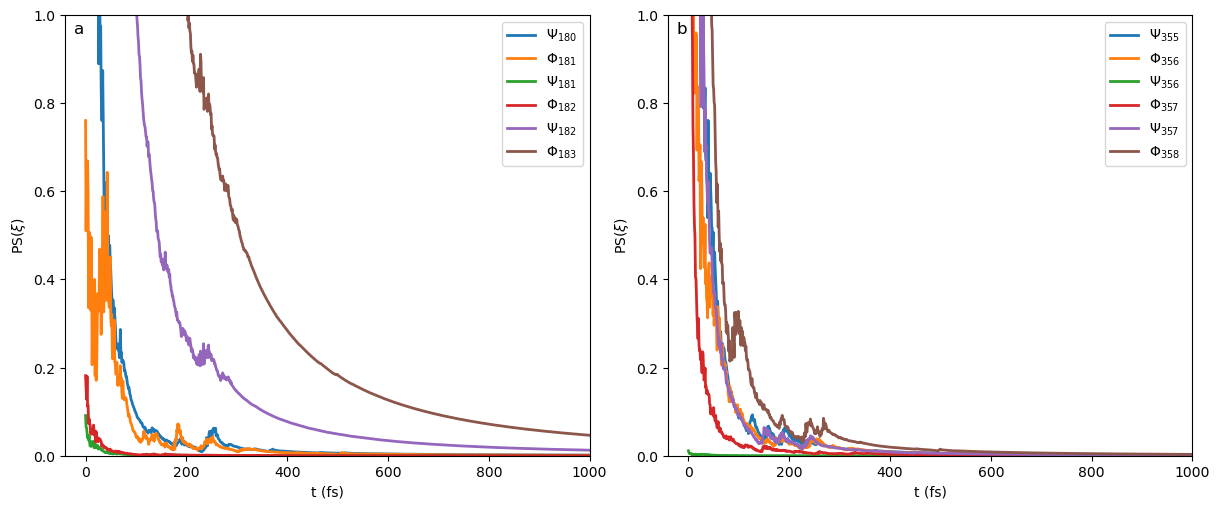

In [18]:
def plot_acf(ax, acf, labels):
    ax.set_xlabel('t (fs)')
    ax.set_ylabel('PS($\\xi$)')
    ax.set_xlim([-40,1000])
    ax.set_ylim([0, 1])
    for dih_acf, label in zip(acf, labels):
        ax.plot(dih_acf[5:], linewidth=2, label=label)
        ax.legend()


ptp1b_labels = ('$\Psi_{180}$', '$\Phi_{181}$', '$\Psi_{181}$', 
                '$\Phi_{182}$', '$\Psi_{182}$', '$\Phi_{183}$',)
yoph_labels = ('$\Psi_{355}$', '$\Phi_{356}$', '$\Psi_{356}$', 
               '$\Phi_{357}$', '$\Psi_{357}$', '$\Phi_{358}$',)        

fig, axs = plt.subplot_mosaic([['a', 'b']], figsize=(12,5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.15)
plot_acf(axs['a'], ptp1b_acf, ptp1b_labels)
plot_acf(axs['b'], yoph_acf, yoph_labels)

for label, ax in axs.items():
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(-0.01, 1.0, label, transform=ax.transAxes + trans, verticalalignment='top', fontsize='large')
    
plt.savefig('FigS7.png', dpi=300, bbox_inches='tight')
plt.show()